### Created a portfolio using BAB strategy
- BAB strategy - The basic bet against beta strategy is to find assets with higher bets and take a short position in them. 
- The idea is the higher beta assets are overpriced and the lower beta assets are underpriced.
- *Note:* BAB strategy is to buy high-beta stocks and sell low-beta stocks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob
import yfinance as yf

In [2]:
os.getcwd()

'D:\\stock analysis\\portfolio'

In [3]:
# read nifty50list company
nifty_list = pd.read_csv('ind_nifty50list.csv')
nifty_list.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024


In [4]:
#extracting the symbol of the nifty50 list company
nifty_symbol=nifty_list['Symbol']
nifty_symbol

0     ADANIPORTS
1     ASIANPAINT
2       AXISBANK
3     BAJAJ-AUTO
4     BAJFINANCE
5     BAJAJFINSV
6           BPCL
7     BHARTIARTL
8      BRITANNIA
9          CIPLA
10     COALINDIA
11      DIVISLAB
12       DRREDDY
13     EICHERMOT
14          GAIL
15        GRASIM
16       HCLTECH
17      HDFCBANK
18      HDFCLIFE
19    HEROMOTOCO
20      HINDALCO
21    HINDUNILVR
22          HDFC
23     ICICIBANK
24           ITC
25           IOC
26    INDUSINDBK
27          INFY
28      JSWSTEEL
29     KOTAKBANK
30            LT
31           M&M
32        MARUTI
33          NTPC
34     NESTLEIND
35          ONGC
36     POWERGRID
37      RELIANCE
38       SBILIFE
39      SHREECEM
40          SBIN
41     SUNPHARMA
42           TCS
43    TATAMOTORS
44     TATASTEEL
45         TECHM
46         TITAN
47           UPL
48    ULTRACEMCO
49         WIPRO
Name: Symbol, dtype: object

In [5]:
#create an empty list to store the symbol of the downloaded and notdownloaded stock
downloaded_list = []
not_downloaded_list = []

In [6]:
os.getcwd()

'D:\\stock analysis\\portfolio'

In [7]:
#change the working directory to stock the csv file in seperate directory
os.chdir('D:\\stock analysis\\portfolio\\nifty_stock_price')
os.getcwd()

'D:\\stock analysis\\portfolio\\nifty_stock_price'

In [26]:
nifty_df = yf.download('^NSEI','2021-01-27','2021-01-28',interval='1m')

[*********************100%***********************]  1 of 1 completed


In [28]:
nifty_df
nifty_df['Name'] = "^NSEI"
nifty_df.to_csv("^NSEI"+'.csv')

In [8]:
#download 1minute date and store in csv file
for symbol in nifty_list['Symbol']:
    try:
        print(symbol)
        yahoo_symbol = symbol+'.NS'
        stock_df = yf.download(yahoo_symbol,'2021-01-27','2021-01-28',interval='1m')
        stock_df['Name'] = yahoo_symbol
        downloaded_list.append(yahoo_symbol)
        stock_df.to_csv(yahoo_symbol+'.csv')
        print('successfully downloaded...%s\n'%(yahoo_symbol))
    except:
        not_downloaded_list = []
        print('Problem in downloading the %s\n' %(symbol))

ADANIPORTS
[*********************100%***********************]  1 of 1 completed
successfully downloaded...ADANIPORTS.NS

ASIANPAINT
[*********************100%***********************]  1 of 1 completed
successfully downloaded...ASIANPAINT.NS

AXISBANK
[*********************100%***********************]  1 of 1 completed
successfully downloaded...AXISBANK.NS

BAJAJ-AUTO
[*********************100%***********************]  1 of 1 completed
successfully downloaded...BAJAJ-AUTO.NS

BAJFINANCE
[*********************100%***********************]  1 of 1 completed
successfully downloaded...BAJFINANCE.NS

BAJAJFINSV
[*********************100%***********************]  1 of 1 completed
successfully downloaded...BAJAJFINSV.NS

BPCL
[*********************100%***********************]  1 of 1 completed
successfully downloaded...BPCL.NS

BHARTIARTL
[*********************100%***********************]  1 of 1 completed
successfully downloaded...BHARTIARTL.NS

BRITANNIA
[*********************100%************

### combine all close price with col_name as cpy name

In [29]:
filename = glob.glob('D:/stock analysis/portfolio/nifty_stock_price/*.csv')
filename

['D:/stock analysis/portfolio/nifty_stock_price\\ADANIPORTS.NS.csv',
 'D:/stock analysis/portfolio/nifty_stock_price\\ASIANPAINT.NS.csv',
 'D:/stock analysis/portfolio/nifty_stock_price\\AXISBANK.NS.csv',
 'D:/stock analysis/portfolio/nifty_stock_price\\BAJAJ-AUTO.NS.csv',
 'D:/stock analysis/portfolio/nifty_stock_price\\BAJAJFINSV.NS.csv',
 'D:/stock analysis/portfolio/nifty_stock_price\\BAJFINANCE.NS.csv',
 'D:/stock analysis/portfolio/nifty_stock_price\\BHARTIARTL.NS.csv',
 'D:/stock analysis/portfolio/nifty_stock_price\\BPCL.NS.csv',
 'D:/stock analysis/portfolio/nifty_stock_price\\BRITANNIA.NS.csv',
 'D:/stock analysis/portfolio/nifty_stock_price\\CIPLA.NS.csv',
 'D:/stock analysis/portfolio/nifty_stock_price\\COALINDIA.NS.csv',
 'D:/stock analysis/portfolio/nifty_stock_price\\DIVISLAB.NS.csv',
 'D:/stock analysis/portfolio/nifty_stock_price\\DRREDDY.NS.csv',
 'D:/stock analysis/portfolio/nifty_stock_price\\EICHERMOT.NS.csv',
 'D:/stock analysis/portfolio/nifty_stock_price\\GAIL.N

In [30]:
df=((pd.read_csv(file,index_col='Datetime',parse_dates=True)[['Close']])
          .rename(columns={'Close':symbol}) 
          for (file,symbol) in zip(filename,nifty_symbol))

In [31]:
final_df=pd.concat(df,axis=1)

In [32]:
final_df

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,CIPLA,...,SBIN,SUNPHARMA,TCS,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-27 09:15:00+05:30,528.900024,2480.449951,662.400024,4139.750000,9116.900391,4922.649902,576.599976,387.100006,3614.000000,839.799988,...,23308.150391,581.099976,270.149994,644.450012,3258.350098,977.950012,1498.150024,5357.049805,585.099976,438.500000
2021-01-27 09:16:00+05:30,532.599976,2482.500000,660.150024,4125.149902,9134.750000,4906.000000,577.299988,388.799988,3631.250000,842.000000,...,23233.500000,581.200012,272.299988,646.599976,3272.449951,982.650024,1495.000000,5345.000000,589.450012,441.700012
2021-01-27 09:17:00+05:30,534.049988,2475.649902,661.000000,4126.850098,9130.849609,4897.850098,578.000000,388.500000,3630.050049,842.000000,...,23201.000000,581.000000,270.000000,644.799988,3270.399902,980.000000,1491.199951,5365.649902,592.000000,442.600006
2021-01-27 09:18:00+05:30,530.400024,2472.149902,661.750000,4120.000000,9111.000000,4894.649902,576.849976,386.700012,3629.550049,838.150024,...,23205.000000,579.049988,267.250000,642.049988,3273.250000,976.250000,1490.000000,5366.350098,587.500000,441.350006
2021-01-27 09:19:00+05:30,531.450012,2475.149902,659.849976,4114.250000,9130.750000,4899.649902,577.349976,385.899994,3622.149902,834.950012,...,23197.849609,580.000000,268.600006,644.650024,3275.100098,977.250000,1494.400024,5376.000000,591.900024,442.299988
2021-01-27 09:20:00+05:30,531.849976,2479.449951,658.950012,4117.950195,9130.000000,4904.899902,577.950012,385.250000,3625.800049,832.099976,...,23277.650391,576.950012,268.200012,644.599976,3273.350098,979.049988,1495.250000,5402.100098,597.250000,443.049988
2021-01-27 09:21:00+05:30,533.200012,2481.350098,656.349976,4122.250000,9141.950195,4907.600098,576.349976,384.000000,3627.800049,832.049988,...,23318.000000,577.549988,268.000000,644.700012,3274.000000,981.500000,1498.500000,5425.250000,597.349976,443.549988
2021-01-27 09:22:00+05:30,535.849976,2481.750000,653.849976,4124.149902,9134.950195,4902.350098,576.200012,383.899994,3624.449951,826.200012,...,23328.099609,575.099976,268.200012,643.549988,3270.050049,981.000000,1496.000000,5420.649902,598.849976,442.750000
2021-01-27 09:23:00+05:30,534.000000,2483.500000,652.650024,4126.200195,9136.150391,4914.649902,575.700012,386.549988,3626.449951,828.799988,...,23370.000000,576.549988,268.600006,643.349976,3278.149902,982.500000,1495.150024,5455.000000,597.700012,443.200012


In [33]:
final_df['^NSEI'] = nifty_df['Close']

In [34]:
final_df

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,CIPLA,...,SUNPHARMA,TCS,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO,^NSEI
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-27 09:15:00+05:30,528.900024,2480.449951,662.400024,4139.750000,9116.900391,4922.649902,576.599976,387.100006,3614.000000,839.799988,...,581.099976,270.149994,644.450012,3258.350098,977.950012,1498.150024,5357.049805,585.099976,438.500000,14169.450195
2021-01-27 09:16:00+05:30,532.599976,2482.500000,660.150024,4125.149902,9134.750000,4906.000000,577.299988,388.799988,3631.250000,842.000000,...,581.200012,272.299988,646.599976,3272.449951,982.650024,1495.000000,5345.000000,589.450012,441.700012,14185.099609
2021-01-27 09:17:00+05:30,534.049988,2475.649902,661.000000,4126.850098,9130.849609,4897.850098,578.000000,388.500000,3630.050049,842.000000,...,581.000000,270.000000,644.799988,3270.399902,980.000000,1491.199951,5365.649902,592.000000,442.600006,14180.450195
2021-01-27 09:18:00+05:30,530.400024,2472.149902,661.750000,4120.000000,9111.000000,4894.649902,576.849976,386.700012,3629.550049,838.150024,...,579.049988,267.250000,642.049988,3273.250000,976.250000,1490.000000,5366.350098,587.500000,441.350006,14157.900391
2021-01-27 09:19:00+05:30,531.450012,2475.149902,659.849976,4114.250000,9130.750000,4899.649902,577.349976,385.899994,3622.149902,834.950012,...,580.000000,268.600006,644.650024,3275.100098,977.250000,1494.400024,5376.000000,591.900024,442.299988,14168.500000
2021-01-27 09:20:00+05:30,531.849976,2479.449951,658.950012,4117.950195,9130.000000,4904.899902,577.950012,385.250000,3625.800049,832.099976,...,576.950012,268.200012,644.599976,3273.350098,979.049988,1495.250000,5402.100098,597.250000,443.049988,14167.049805
2021-01-27 09:21:00+05:30,533.200012,2481.350098,656.349976,4122.250000,9141.950195,4907.600098,576.349976,384.000000,3627.800049,832.049988,...,577.549988,268.000000,644.700012,3274.000000,981.500000,1498.500000,5425.250000,597.349976,443.549988,14161.099609
2021-01-27 09:22:00+05:30,535.849976,2481.750000,653.849976,4124.149902,9134.950195,4902.350098,576.200012,383.899994,3624.449951,826.200012,...,575.099976,268.200012,643.549988,3270.050049,981.000000,1496.000000,5420.649902,598.849976,442.750000,14152.500000
2021-01-27 09:23:00+05:30,534.000000,2483.500000,652.650024,4126.200195,9136.150391,4914.649902,575.700012,386.549988,3626.449951,828.799988,...,576.549988,268.600006,643.349976,3278.149902,982.500000,1495.150024,5455.000000,597.700012,443.200012,14158.150391


In [35]:
final_df.reset_index(inplace=True)

In [36]:
final_df

,Datetime,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,...,SUNPHARMA,TCS,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO,^NSEI
0,2021-01-27 09:15:00+05:30,528.900024,2480.449951,662.400024,4139.750000,9116.900391,4922.649902,576.599976,387.100006,3614.000000,...,581.099976,270.149994,644.450012,3258.350098,977.950012,1498.150024,5357.049805,585.099976,438.500000,14169.450195
1,2021-01-27 09:16:00+05:30,532.599976,2482.500000,660.150024,4125.149902,9134.750000,4906.000000,577.299988,388.799988,3631.250000,...,581.200012,272.299988,646.599976,3272.449951,982.650024,1495.000000,5345.000000,589.450012,441.700012,14185.099609
2,2021-01-27 09:17:00+05:30,534.049988,2475.649902,661.000000,4126.850098,9130.849609,4897.850098,578.000000,388.500000,3630.050049,...,581.000000,270.000000,644.799988,3270.399902,980.000000,1491.199951,5365.649902,592.000000,442.600006,14180.450195
3,2021-01-27 09:18:00+05:30,530.400024,2472.149902,661.750000,4120.000000,9111.000000,4894.649902,576.849976,386.700012,3629.550049,...,579.049988,267.250000,642.049988,3273.250000,976.250000,1490.000000,5366.350098,587.500000,441.350006,14157.900391
4,2021-01-27 09:19:00+05:30,531.450012,2475.149902,659.849976,4114.250000,9130.750000,4899.649902,577.349976,385.899994,3622.149902,...,580.000000,268.600006,644.650024,3275.100098,977.250000,1494.400024,5376.000000,591.900024,442.299988,14168.500000
5,2021-01-27 09:20:00+05:30,531.849976,2479.449951,658.950012,4117.950195,9130.000000,4904.899902,577.950012,385.250000,3625.800049,...,576.950012,268.200012,644.599976,3273.350098,979.049988,1495.250000,5402.100098,597.250000,443.049988,14167.049805
6,2021-01-27 09:21:00+05:30,533.200012,2481.350098,656.349976,4122.250000,9141.950195,4907.600098,576.349976,384.000000,3627.800049,...,577.549988,268.000000,644.700012,3274.000000,981.500000,1498.500000,5425.250000,597.349976,443.549988,14161.099609
7,2021-01-27 09:22:00+05:30,535.849976,2481.750000,653.849976,4124.149902,9134.950195,4902.350098,576.200012,383.899994,3624.449951,...,575.099976,268.200012,643.549988,3270.050049,981.000000,1496.000000,5420.649902,598.849976,442.750000,14152.500000
8,2021-01-27 09:23:00+05:30,534.000000,2483.500000,652.650024,4126.200195,9136.150391,4914.649902,575.700012,386.549988,3626.449951,...,576.549988,268.600006,643.349976,3278.149902,982.500000,1495.150024,5455.000000,597.700012,443.200012,14158.150391
9,2021-01-27 09:24:00+05:30,533.450012,2493.399902,650.599976,4125.000000,9149.549805,4915.049805,576.299988,385.100006,3629.649902,...,577.299988,268.500000,641.049988,3272.500000,980.900024,1498.000000,5466.549805,599.950012,442.700012,14159.650391


In [37]:
final_df['Datetime'] = pd.to_datetime(final_df['Datetime']).dt.strftime('%H:%M')

In [38]:
final_df.set_index('Datetime',inplace=True)

In [39]:
final_df

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,CIPLA,...,SUNPHARMA,TCS,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO,^NSEI
Datetime,,,,,,,,,,,,,,,,,,,,,
09:15,528.900024,2480.449951,662.400024,4139.750000,9116.900391,4922.649902,576.599976,387.100006,3614.000000,839.799988,...,581.099976,270.149994,644.450012,3258.350098,977.950012,1498.150024,5357.049805,585.099976,438.500000,14169.450195
09:16,532.599976,2482.500000,660.150024,4125.149902,9134.750000,4906.000000,577.299988,388.799988,3631.250000,842.000000,...,581.200012,272.299988,646.599976,3272.449951,982.650024,1495.000000,5345.000000,589.450012,441.700012,14185.099609
09:17,534.049988,2475.649902,661.000000,4126.850098,9130.849609,4897.850098,578.000000,388.500000,3630.050049,842.000000,...,581.000000,270.000000,644.799988,3270.399902,980.000000,1491.199951,5365.649902,592.000000,442.600006,14180.450195
09:18,530.400024,2472.149902,661.750000,4120.000000,9111.000000,4894.649902,576.849976,386.700012,3629.550049,838.150024,...,579.049988,267.250000,642.049988,3273.250000,976.250000,1490.000000,5366.350098,587.500000,441.350006,14157.900391
09:19,531.450012,2475.149902,659.849976,4114.250000,9130.750000,4899.649902,577.349976,385.899994,3622.149902,834.950012,...,580.000000,268.600006,644.650024,3275.100098,977.250000,1494.400024,5376.000000,591.900024,442.299988,14168.500000
09:20,531.849976,2479.449951,658.950012,4117.950195,9130.000000,4904.899902,577.950012,385.250000,3625.800049,832.099976,...,576.950012,268.200012,644.599976,3273.350098,979.049988,1495.250000,5402.100098,597.250000,443.049988,14167.049805
09:21,533.200012,2481.350098,656.349976,4122.250000,9141.950195,4907.600098,576.349976,384.000000,3627.800049,832.049988,...,577.549988,268.000000,644.700012,3274.000000,981.500000,1498.500000,5425.250000,597.349976,443.549988,14161.099609
09:22,535.849976,2481.750000,653.849976,4124.149902,9134.950195,4902.350098,576.200012,383.899994,3624.449951,826.200012,...,575.099976,268.200012,643.549988,3270.050049,981.000000,1496.000000,5420.649902,598.849976,442.750000,14152.500000
09:23,534.000000,2483.500000,652.650024,4126.200195,9136.150391,4914.649902,575.700012,386.549988,3626.449951,828.799988,...,576.549988,268.600006,643.349976,3278.149902,982.500000,1495.150024,5455.000000,597.700012,443.200012,14158.150391


### daily percentage change

In [43]:
daily_pct_change = final_df.pct_change().dropna()

In [44]:
daily_pct_change

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,CIPLA,...,SUNPHARMA,TCS,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO,^NSEI
Datetime,,,,,,,,,,,,,,,,,,,,,
09:16,0.006996,0.000826,-0.003397,-0.003527,0.001958,-0.003382,0.001214,0.004392,0.004773,0.002620,...,0.000172,0.007959,0.003336,0.004327,0.004806,-0.002103,-0.002249,0.007435,0.007298,0.001104
09:17,0.002723,-0.002759,0.001288,0.000412,-0.000427,-0.001661,0.001213,-0.000772,-0.000330,0.000000,...,-0.000344,-0.008447,-0.002784,-0.000626,-0.002697,-0.002542,0.003863,0.004326,0.002038,-0.000328
09:18,-0.006834,-0.001414,0.001135,-0.001660,-0.002174,-0.000653,-0.001990,-0.004633,-0.000138,-0.004572,...,-0.003356,-0.010185,-0.004265,0.000871,-0.003827,-0.000805,0.000130,-0.007601,-0.002824,-0.001590
09:19,0.001980,0.001214,-0.002871,-0.001396,0.002168,0.001022,0.000867,-0.002069,-0.002039,-0.003818,...,0.001641,0.005051,0.004050,0.000565,0.001024,0.002953,0.001798,0.007489,0.002152,0.000749
09:20,0.000753,0.001737,-0.001364,0.000899,-0.000082,0.001072,0.001039,-0.001684,0.001008,-0.003413,...,-0.005259,-0.001489,-0.000078,-0.000534,0.001842,0.000569,0.004855,0.009039,0.001696,-0.000102
09:21,0.002538,0.000766,-0.003946,0.001044,0.001309,0.000551,-0.002768,-0.003245,0.000552,-0.000060,...,0.001040,-0.000746,0.000155,0.000199,0.002502,0.002174,0.004285,0.000167,0.001129,-0.000420
09:22,0.004970,0.000161,-0.003809,0.000461,-0.000766,-0.001070,-0.000260,-0.000260,-0.000923,-0.007031,...,-0.004242,0.000746,-0.001784,-0.001206,-0.000509,-0.001668,-0.000848,0.002511,-0.001804,-0.000607
09:23,-0.003452,0.000705,-0.001835,0.000497,0.000131,0.002509,-0.000868,0.006903,0.000552,0.003147,...,0.002521,0.001491,-0.000311,0.002477,0.001529,-0.000568,0.006337,-0.001920,0.001016,0.000399
09:24,-0.001030,0.003986,-0.003141,-0.000291,0.001467,0.000081,0.001042,-0.003751,0.000882,0.002111,...,0.001301,-0.000372,-0.003575,-0.001724,-0.001628,0.001906,0.002117,0.003764,-0.001128,0.000106


### calculate the beta

In [22]:
import statsmodels.api as sm

In [45]:
def calc_beta(y,x):
    model = sm.OLS(y,x)
    results = model.fit()
    return results.params[0]

In [55]:
beta = pd.DataFrame(index=[0])
beta


""
0


In [60]:
for ticker in daily_pct_change.columns:
    beta[ticker] = calc_beta(daily_pct_change.loc[:,ticker],daily_pct_change.loc[:,'^NSEI'])
beta = beta.T

In [61]:
beta

,0
ADANIPORTS,1.442973
ASIANPAINT,0.627647
AXISBANK,1.393795
BAJAJ-AUTO,1.065933
BAJFINANCE,1.088423
BAJAJFINSV,1.216744
BPCL,1.043357
BHARTIARTL,0.879784
BRITANNIA,0.365487
CIPLA,0.821694


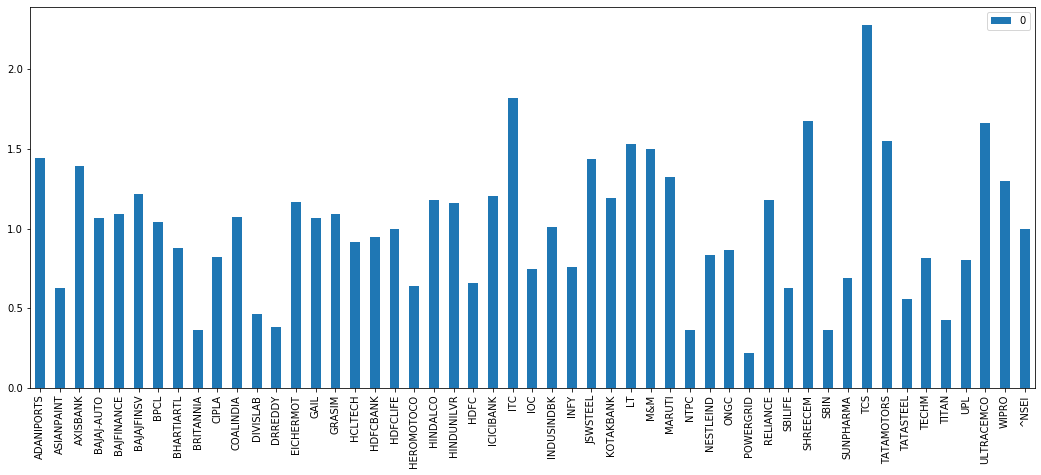

In [63]:
beta.plot.bar(figsize=(18,7))
plt.show()

### Alpha 1:Beta<0.7 

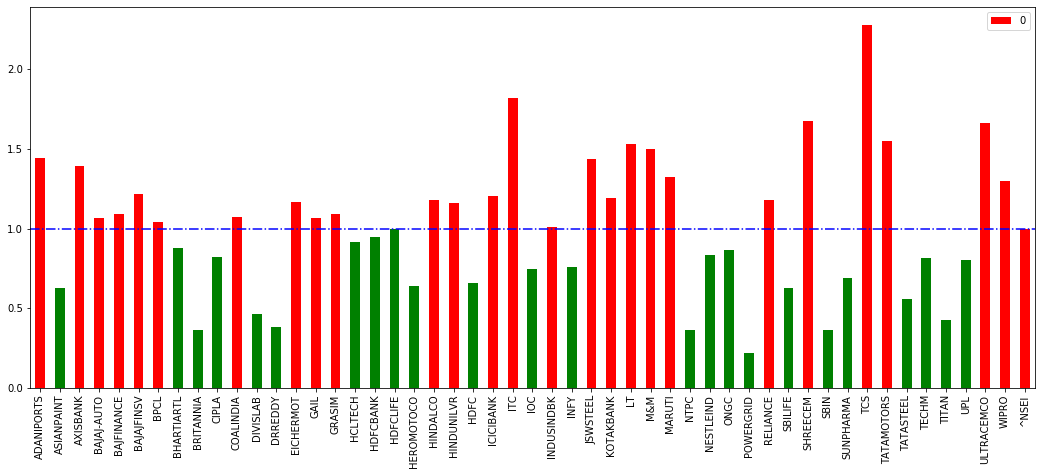

In [67]:
beta.plot.bar(figsize=(18,7),color=np.where(beta<1,'g','r').T)
plt.axhline(1, linestyle='-.',color='blue')
plt.show()

In [73]:
low_beta = beta[beta.values<1].index
low_beta

Index(['ASIANPAINT', 'BHARTIARTL', 'BRITANNIA', 'CIPLA', 'DIVISLAB', 'DRREDDY',
       'HCLTECH', 'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HDFC', 'IOC', 'INFY',
       'NTPC', 'NESTLEIND', 'ONGC', 'POWERGRID', 'SBILIFE', 'SBIN',
       'SUNPHARMA', 'TATASTEEL', 'TECHM', 'TITAN', 'UPL'],
      dtype='object')

In [82]:
def plot_performance(stock_list,strategy_name):
    stock_returns = daily_pct_change.loc[:,stock_list]
    (stock_returns+1).cumprod().plot(figsize=(10,7),legend="left")
    plt.title(strategy_name)
    plt.show()
    
    portfolio = stock_returns.mean(axis=1)
    (portfolio+1).cumprod().plot(figsize=(10,7),label='BAB + ROE')
    plt.title(strategy_name + ' portfolio performance')
    
    nifty = daily_pct_change.loc[:,'^NSEI']
    (nifty+1).cumprod().plot(figsize=(10,7),label='Nifty')
    plt.legend()
    plt.show

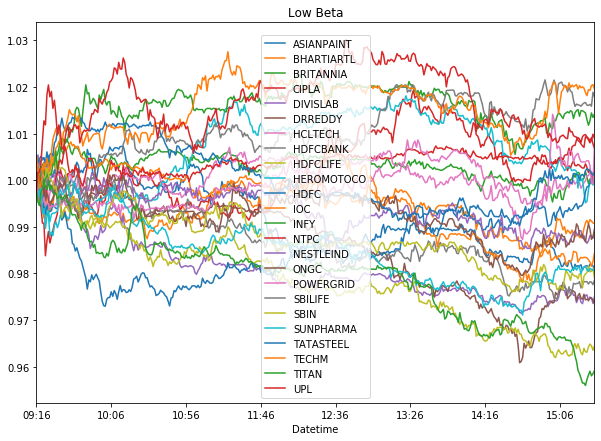

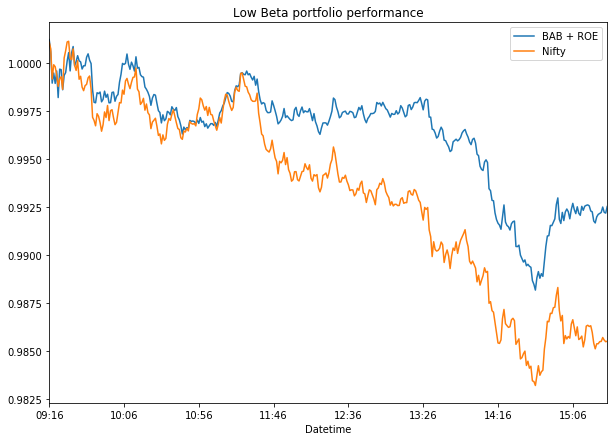

In [83]:
plot_performance(low_beta,'Low Beta')

In [86]:
high_beta = beta[beta.values >= 1].index
high_beta

Index(['ADANIPORTS', 'AXISBANK', 'BAJAJ-AUTO', 'BAJFINANCE', 'BAJAJFINSV',
       'BPCL', 'COALINDIA', 'EICHERMOT', 'GAIL', 'GRASIM', 'HINDALCO',
       'HINDUNILVR', 'ICICIBANK', 'ITC', 'INDUSINDBK', 'JSWSTEEL', 'KOTAKBANK',
       'LT', 'M&M', 'MARUTI', 'RELIANCE', 'SHREECEM', 'TCS', 'TATAMOTORS',
       'ULTRACEMCO', 'WIPRO', '^NSEI'],
      dtype='object')

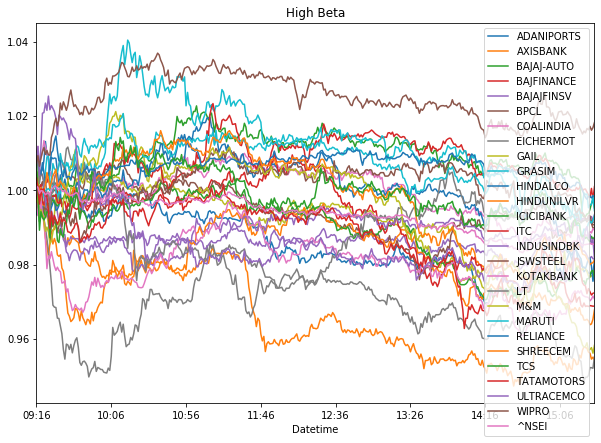

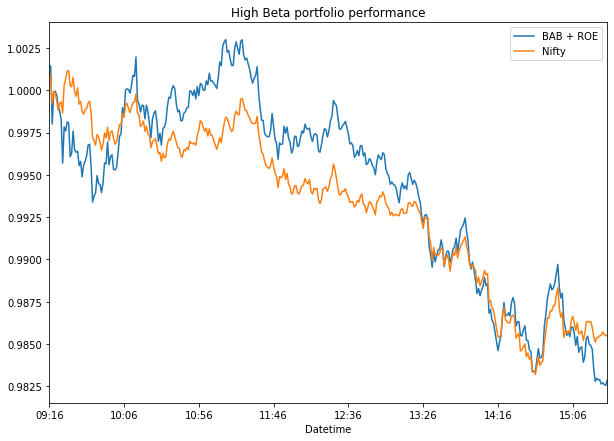

In [87]:
plot_performance(high_beta,'High Beta')